# Kaggle Titanic Project
https://www.kaggle.com/c/titanic

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read in data
data = pd.read_csv("data/train.csv")

## Data Exploration

In [3]:
#preview data
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Descriptive statistics of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Review correlations. Focusing on what attributes are correlated with Survived, PClass and Fare have stronger correlations with Survived. 

Sex isn't included in matrix as it is categorical data, will add column to describe Sex numerically.

Age also didnt seem to be strongly correlated with survival, based off what I know of the titanic from the movie, they attempted to save children. I'll generate an additional column to categorize "Child" as being under 18. 

In [6]:
#code in a binary Male column
data['Male'] = np.where(data['Sex'] == "male",1,0) 

#code in a binary Child column
data['Child'] = np.where(data['Age'] <= 16.00,1,0) 

data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Child
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.022090
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.121485
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.128232
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.603069
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,0.337773
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,0.334728
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.004405
Male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.102403
Child,-0.022090,0.121485,0.128232,-0.603069,0.337773,0.334728,-0.004405,-0.102403,1.000000


Being Male has a strong negative correlation with Survived. Will look into relationship between Survived, Sex, and Pclass/Fare below

After specifying Child criteria, the correlation wiht Survived is low.

Now I will look into the relationship between Survived, Sex, and Pclass/Fare below

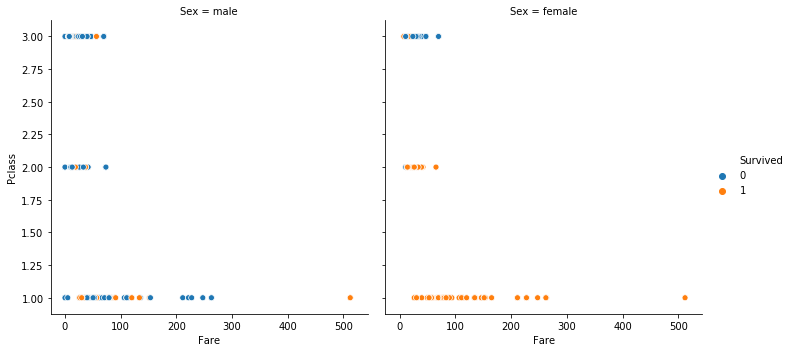

In [7]:
#Segment male/female, plot Fare vs Pclass while highlighted Survived
sns.relplot(x="Fare", y = "Pclass", hue ="Survived", col = "Sex", data = data);

Based on the graphs above

    I'm curious if 1st class males had a higher survival rate than 3rd class females
    
    Their is a much larger variation in Fare for 1st class. This obscures viewing the relationship of Fare on survivorship for Pclass 2 and 3     where there is less variation.

In [8]:
#Check average survivalship for Pclass amoung Sex
data.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


After checking the average survivalship amoung Pclass and Sex we know almost all Females in Pclass 1 and 2 survived. We should take a look at demographics with mixed Survival results(i.e. Female Class 3 and Male Class 1) and see if there are any distinguishing factors. 

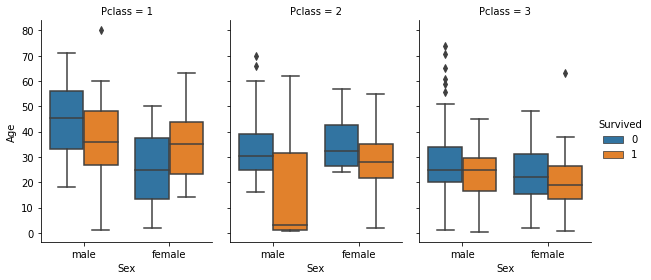

In [9]:
#Boxplot to highlight Survived vs Age by Class
sns.catplot( x = "Sex", y="Age",hue="Survived", data=data, col = "Pclass", kind="box",height=4, aspect=.7);

I could mine the data further but am decided to move on. In the future I could segment the data to see if class three females with kids had better chance of survival than class three females without kids, etc. etc...

The core purpose of this project was to get familiarized with some the common data analysis packages and some ML techniques. I don't want to get too carried away in the minute details of the data and will move on to some ML.

## Begin Machine Learning

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


### Data Prep

In [12]:
#select core columns of interests from data, needs to be numerical data
core_cols = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Male']]

In [13]:
#check number of NaNs
core_cols.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Male          0
dtype: int64

In [14]:
#fill in NaN Age columns with average of age
avg = core_cols['Age'].mean()
core_cols= core_cols.fillna({
    'Age': avg
})

In [15]:
core_cols.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Male        0
dtype: int64

### Data Splitting

In [16]:
#declare target column and feature matrix
X = core_cols.iloc[:,1:]
y = core_cols.iloc[:,0]

In [17]:
#split up data for training and testing
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [18]:
#spot check matrix sizes
X_train.shape , y_train.shape

((534, 5), (534,))

In [19]:
#spot check matrix sizes
X_test.shape , y_test.shape

((357, 5), (357,))

In [20]:
#spot check feature types
X.dtypes

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Male        int32
dtype: object

### Models

#### Dummy Classifier

Run a Dummy Classifier to get a baseline for comparing our future algorithms

In [21]:
#train model
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

#test model
dummy.score(X_test, y_test)

0.5490196078431373

#### Naive Bayes

Begin with Naive Bayes as a straight forward classifier

Note: 
    Naive Bayes assumes idependence between features, this is not the case with the Titanic Data Set

In [58]:
#fit and train model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
nb_clf.score(X_test, y_test)

0.7591036414565826

Possible improvements: Give less weight for samples that needed to have their Age adjusted for NaNs. 

#### K Nearest Neighbors
Followed https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [24]:
from sklearn import neighbors

In [25]:
#choose n_neighbors. Found choosing 7 maximized classifier
n_neighbors = 7

In [26]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [27]:
knn_clf.score(X_test,y_test) 

0.7591036414565826

Possible Improvements: Pare down features to only the most vital. The more dimensions in the matrix the less distinct the distance between data points becomes.

#### Support Vector Machines
Followed https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [53]:
from sklearn.svm import SVC

In [54]:
model = SVC(kernel='linear', C=2)

In [55]:
model.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
model.support_vectors_

array([[ 3.        , 28.        ,  0.        ,  0.        ,  0.        ],
       [ 3.        , 43.        ,  1.        ,  6.        ,  0.        ],
       [ 3.        , 29.69911765,  3.        ,  1.        ,  0.        ],
       ...,
       [ 1.        , 39.        ,  1.        ,  1.        ,  0.        ],
       [ 3.        , 19.        ,  1.        ,  0.        ,  0.        ],
       [ 3.        , 36.        ,  1.        ,  0.        ,  0.        ]])

In [57]:
model.score(X_test, y_test)

0.7787114845938375

Possible Improvements: Use a non-linear kernel. Start tuning margin parameter(C).

## Summary of Learning
The overall goal of this project was to familiarize myself with some of the basic Python data science tools. Through this process I have familiarized myself with pandas and numpy for handling data. I introduced myself to seaborn, which I now prefer over my previous experience with MatPlotLib. Additionally I learned some of the concepts of machine learning. I didn't want to get carried away with the Machine Learning, but this project did dimystify the Machine Learning, especially with the sklearn package.

Next Steps: Although I could dive deeper and improve the classsification of this data set, I think it is best for my learning to begin a new project. I want to read up more on the conceptual side of data science and ML and find a data set that is more closer aligned with my own interests. 
